# State wise plot

In [2]:
import pandas as pd
import numpy as np

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# this only need to be run once
%load_ext rpy2.ipython
%R library(ggplot2)

%R library(maps)

In [4]:
def handle_na_values(df):
    out_df = df.copy()
    for i in out_df.columns:
        if out_df[i].dtype == np.object:
            out_df[i] = out_df[i].astype(str)
    return out_df

In [5]:
%%R 
library(ggplot2)
library(maps)
library(sf)
library(urbnmapr)
library(dplyr)

In [6]:

def txt_into_df(path ):

    with open(path) as f:
        l = f.read()

    l = l.split('\n')

    l = [i.split('\t') for i in l]

    len_ = len(l[0])

    l = [i for i in l if len(i)==len_]

    return pd.DataFrame(l[1:] , columns = l[0])
    

In [7]:
state = txt_into_df('/Users/nithish/msds/msds593/proj_data/state_2017.txt')

In [8]:
state  = state.iloc[:-1]

In [10]:
state.columns = ["Notes", "State", "State Code", 'Deaths', 'Population',
       'Crude Rate', 'Age Adjusted Rate']

In [11]:
state.State = state.State.apply(lambda x : x.split('"')[1])
state['Age Adjusted Rate'] = state['Age Adjusted Rate'].astype(float)

In [12]:
state = state[['State' , 'Age Adjusted Rate']]

In [13]:
state.columns = ['state_name', 'AAR']

In [14]:
state_df = state

In [15]:
%R -i state_df

In [16]:
state_df.columns

Index(['state_name', 'AAR'], dtype='object')

In [17]:
def color_func(value_in):
    if value_in>40:
        return '1'
    elif 30<value_in<=40:
        return '2'
    elif 20<value_in<=30:
        return '3'
    elif 10<value_in<=20:
        return '4'
    else:
        return '5'

In [18]:
state_df['fill_color'] = state_df.AAR.apply(color_func)

In [19]:
%R -i state_df

In [30]:
%R library(usmap)

array(['usmap', 'dplyr', 'urbnmapr', 'sf', 'maps', 'ggplot2', 'tools',
       'stats', 'graphics', 'grDevices', 'utils', 'datasets', 'methods',
       'base'], dtype='<U9')

In [33]:
%%R
head(statepop)

plot_df <- left_join(statepop , state_df , by=c('full'='state_name'))

R[write to console]: Saving 11 x 11 in image



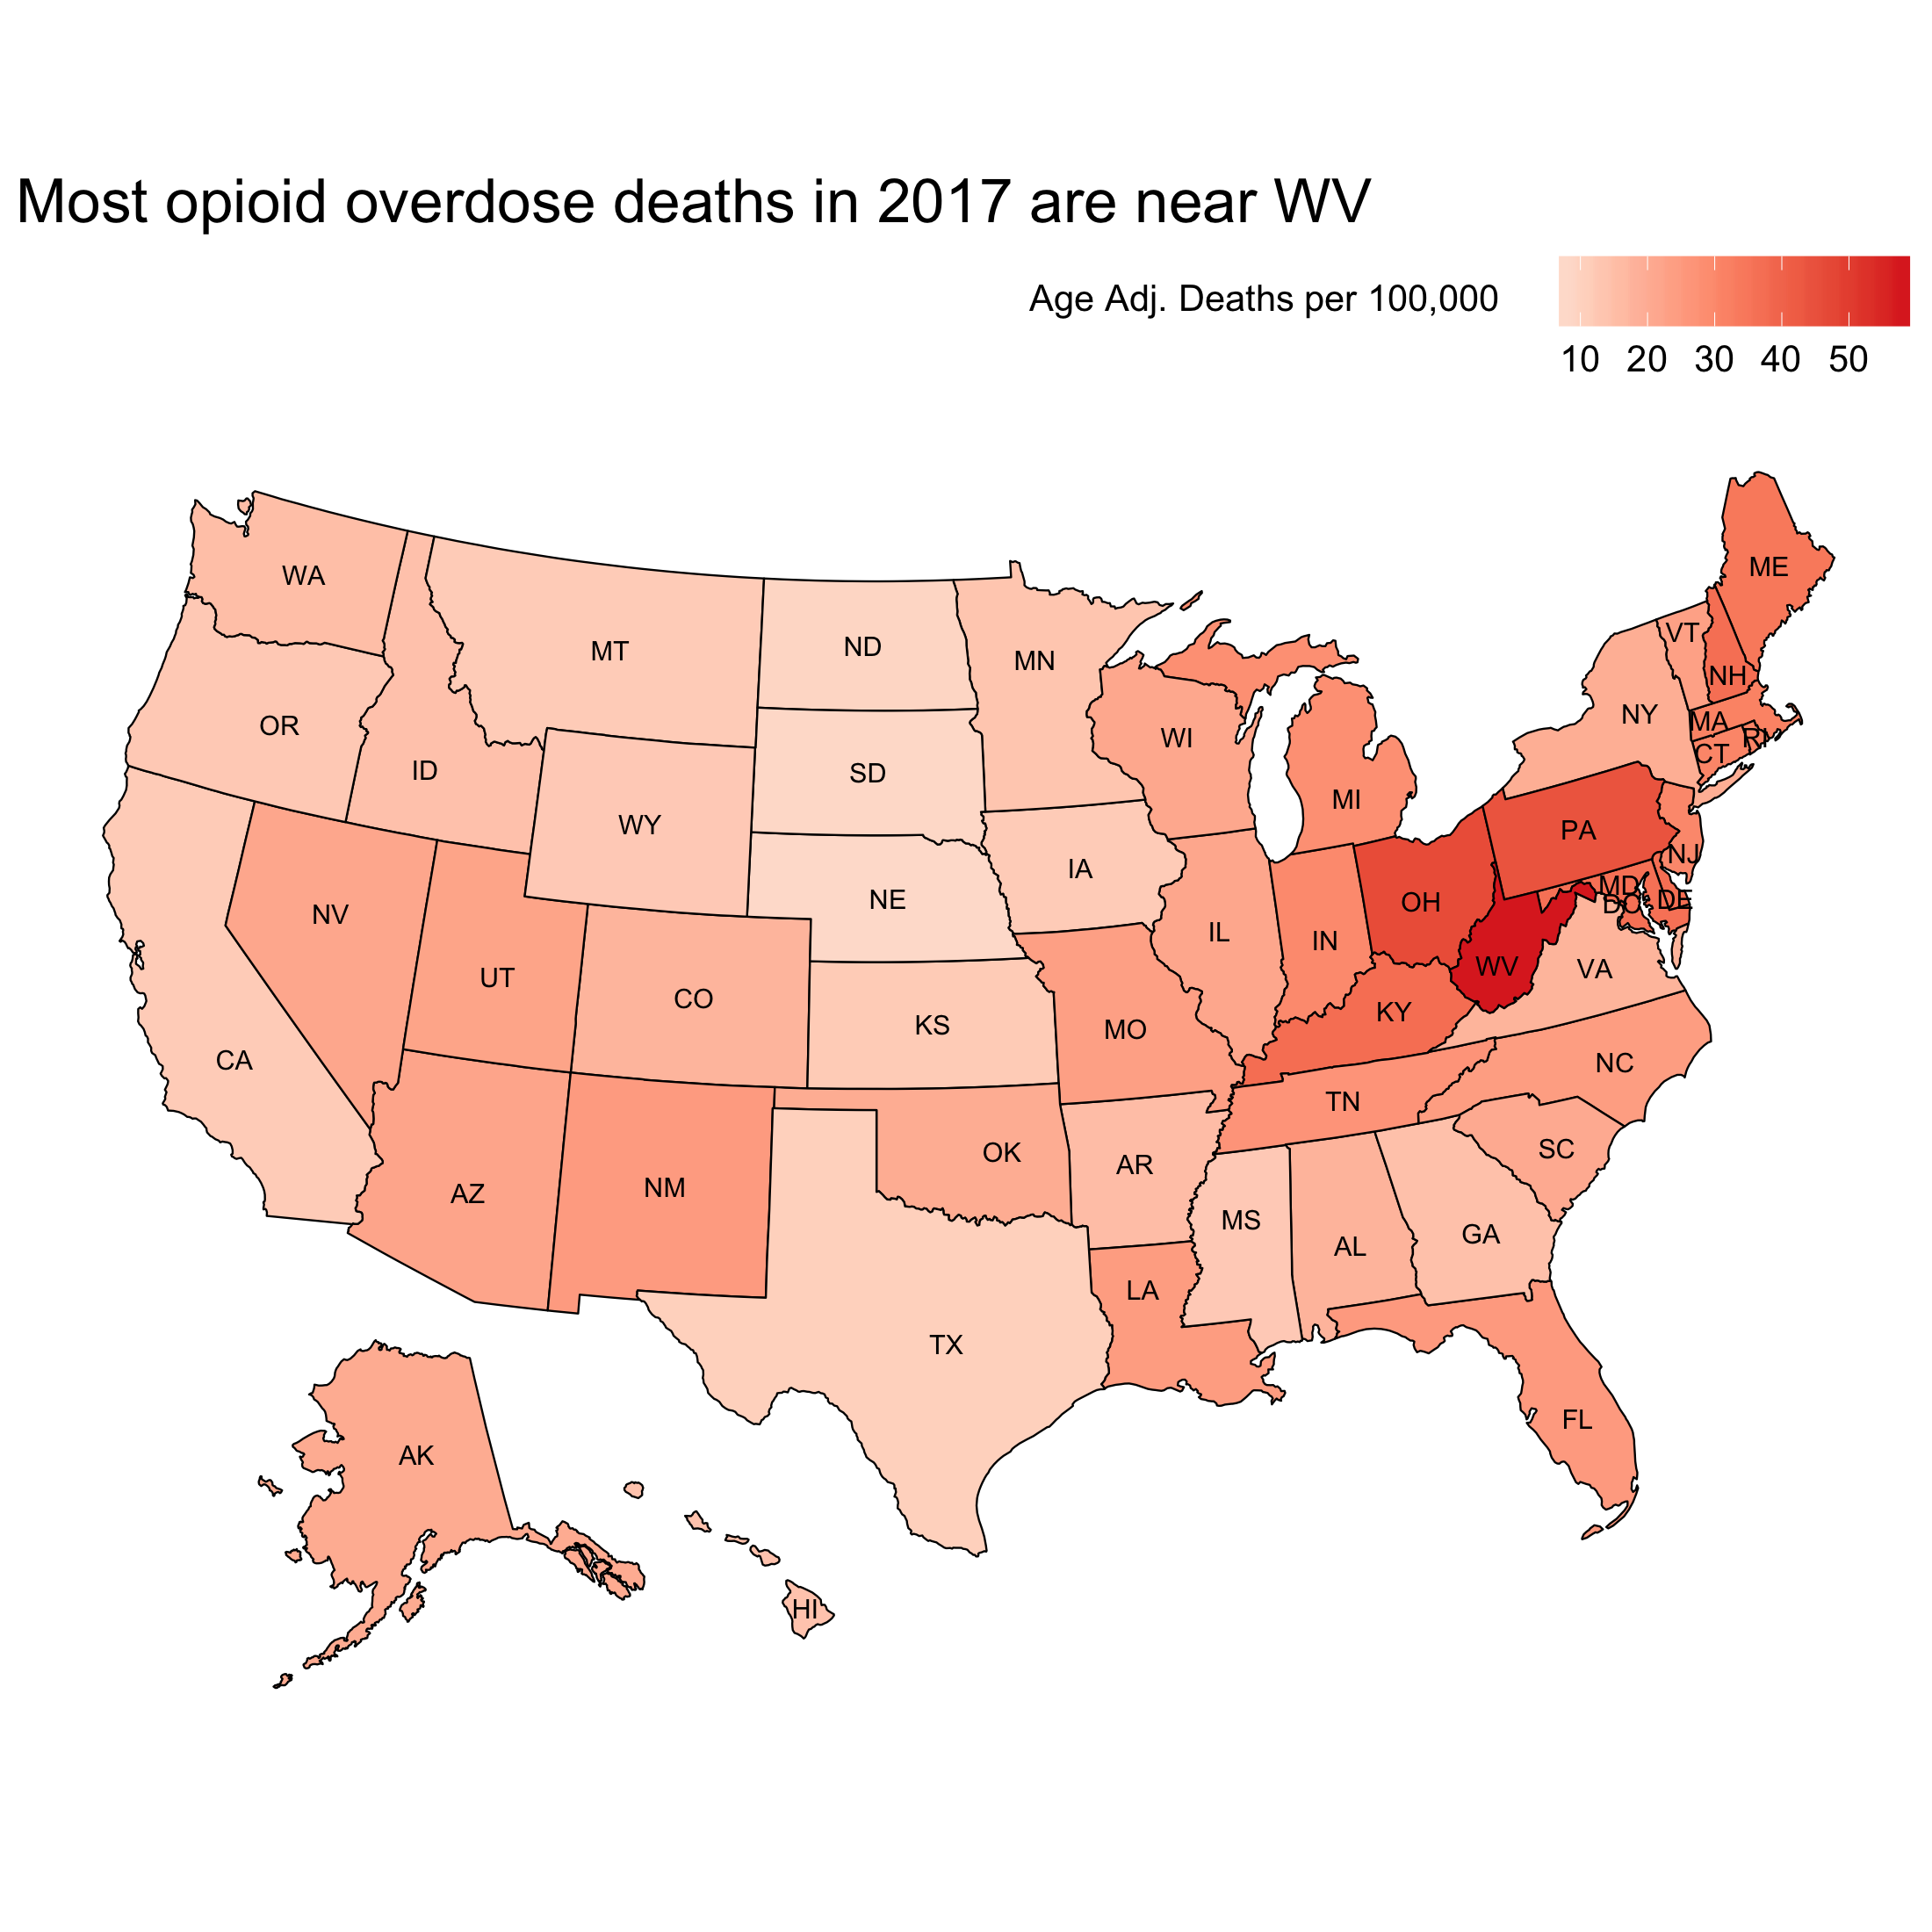

In [62]:
%%R -w 11 -h 11 --units in -r 200




plot_usmap(data = plot_df, values = 'AAR',labels=TRUE) + 

  scale_fill_gradientn(name='Age Adj. Deaths per 100,000    \n' , colours = c('#fee0d2' , '#fc9272' , '#de2d26') )  + 
  theme(legend.position='top',
       legend.justification = c(1,1 ),
       legend.text = element_text(color='black',size=15),
       legend.title=element_text(color='black',size=15),legend.key.size = unit(2,"line"),
       plot.title  = element_text(size=25)) + 
ggtitle('Most opioid overdose deaths in 2017 are near WV') +

ggsave('/Users/nithish/Desktop/plot1_3.png')
  